In [2]:
import numpy as np
import os, time
import matplotlib.pyplot as plt
import skimage
from tqdm import tqdm_notebook

from helper import *

In [3]:
mhd_train_path = r'J:\Data\training'
mhd_test_path = r'J:\Data\testing'
nifti_path = r'J:\Data\database_nifti'

out_main_path = r'J:\Data\Jpeg'

## Nifti нужно будет перевнуть на 90 градусов, или не переворачивать и сравнить качество

In [4]:
# Это в train
mhd_paths = get_image_filepaths(mhd_train_path, 'mhd', as_mask=False)
mhd_paths_msk = get_image_filepaths(mhd_train_path, 'mhd', as_mask=True)
len(mhd_paths), len(mhd_paths_msk)

(1800, 1800)

In [5]:
#
nifti_paths = get_image_filepaths(nifti_path, 'nii', as_mask=False)
nifti_paths_msk = get_image_filepaths(nifti_path, 'nii', as_mask=True)

len(nifti_paths), len(nifti_paths_msk)

(2000, 2000)

In [6]:
all_imgs_paths = mhd_paths + nifti_paths
all_masks_paths = mhd_paths_msk + nifti_paths_msk

len(all_imgs_paths), len(all_masks_paths)

(3800, 3800)

In [6]:
mhd_paths[-1].split('_')

['J:\\Data\\training\\patient0450\\patient0450', '4CH', 'ES.mhd']

In [7]:
def format2jpeg(in_paths, out_path, output_shape, is_mask):
    """ Remove all folder """
    # # Find all paths in folder
    # paths = get_image_filepaths(in_paths, 'nii', as_mask=False)
    # 
    for i, path in tqdm_notebook(enumerate(in_paths)):
        # 
        folder, img_format = path.split('.')
        # 
        if img_format == "nii":
            img = read_nifti(path)
            
        elif img_format == "mhd":
            img = read_mhd(path)
        
        # Obtain needed image shape
        img = skimage.transform.resize(img, output_shape=output_shape)
        # Save image
        name = os.path.join(out_path, f"{str(i+1).zfill(4)}.jpeg")
        
        skimage.io.imsave(name, img)
    
    return 

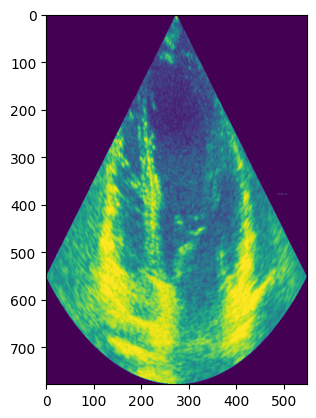

In [8]:
plt.imshow(read_mhd(all_imgs_paths[2]));

In [8]:
# IMAGES FOR TRAIN
format2jpeg(
    in_paths=all_imgs_paths[:-200],   # Because 200 we'll use in test
    out_path=os.path.join(out_main_path, 'train', 'images'),
    output_shape=(512, 512),
    is_mask=False
)

0it [00:00, ?it/s]

ValueError: not enough values to unpack (expected 2, got 1)